# 1. Import essential libraries

In [26]:
# Data wranggling
import pandas as pd
import numpy as np
import missingno as mn

# Plotting figures
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warning
import warnings
warnings.filterwarnings('ignore')

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# 2. Get the data and perform data analysis

In [27]:
train = pd.read_csv('digit-recognizer/train.csv')
test = pd.read_csv('digit-recognizer/test.csv')
ss = pd.read_csv('digit-recognizer/sample_submission.csv')

In [28]:
# check the train dataset
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# check the test dataset
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# check the sample submission dataset
ss.tail()

,ImageId,Label
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0
27999,28000,0


In [31]:
# check the shapes
train.shape, test.shape, ss.shape

((42000, 785), (28000, 784), (28000, 2))

In [32]:
# get the statistical description of the train dataset
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [33]:
# check of null values in the train dataset
train.isna().sum().sort_values(ascending=False)

label       0
pixel515    0
pixel517    0
pixel518    0
pixel519    0
           ..
pixel263    0
pixel264    0
pixel265    0
pixel266    0
pixel783    0
Length: 785, dtype: int64

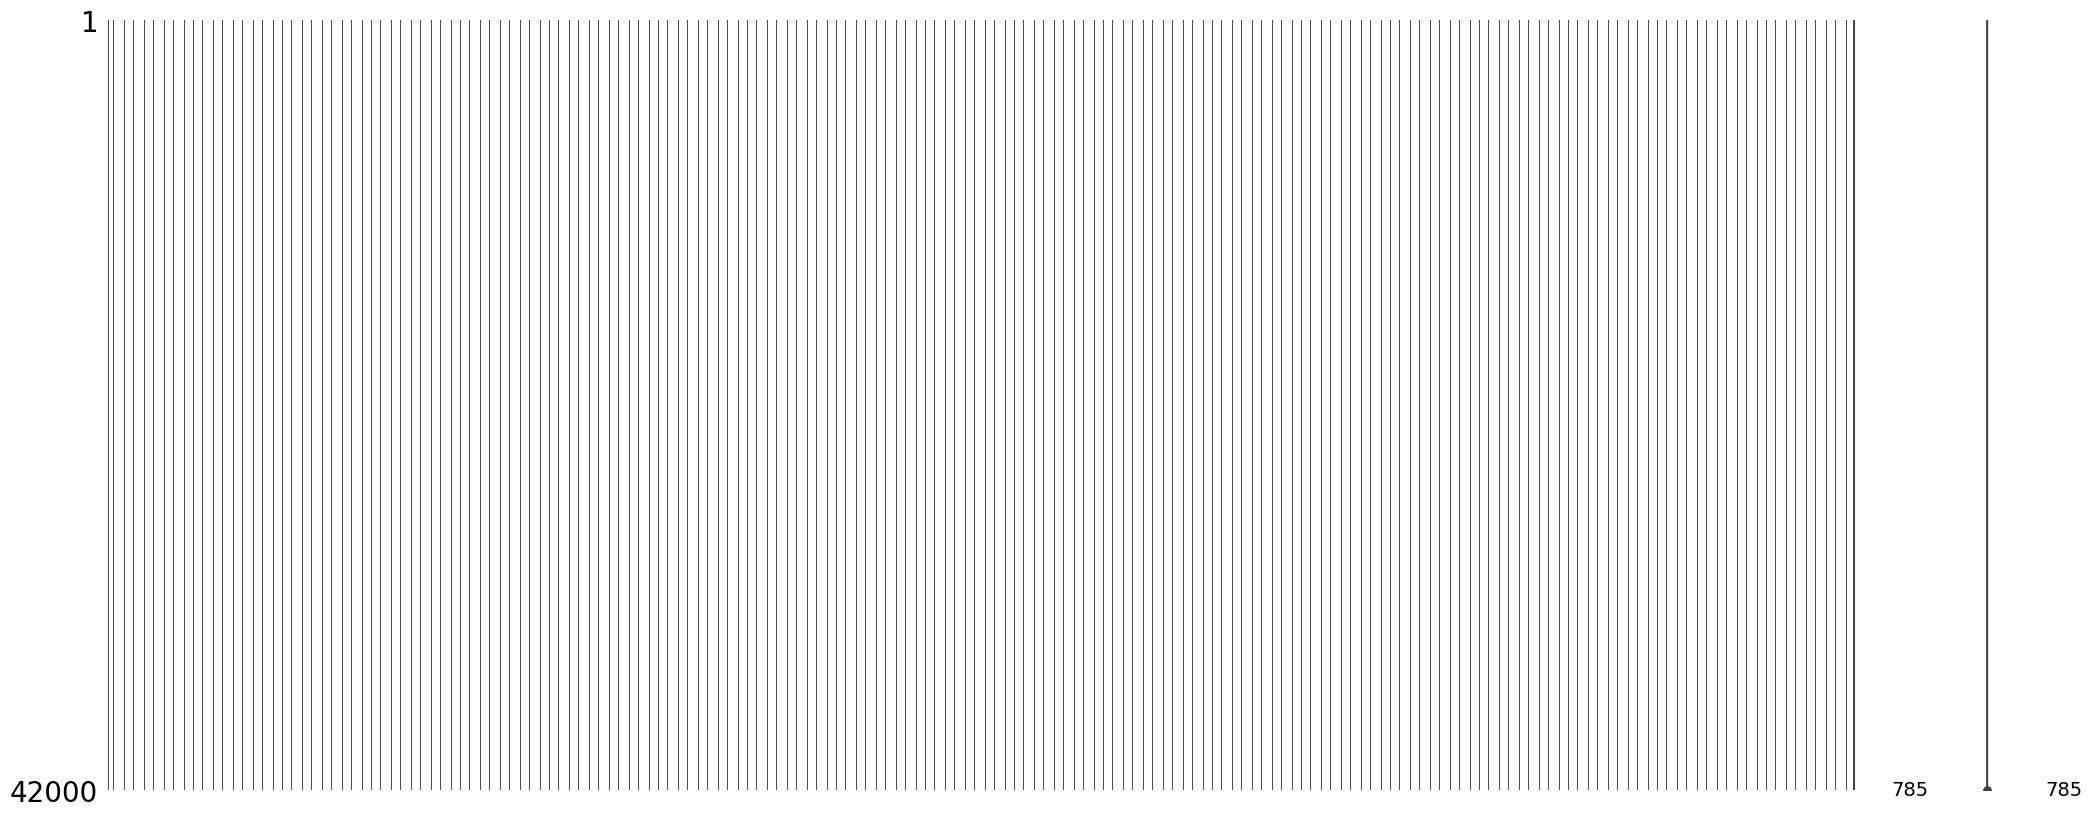

In [34]:
# visualise the missing values in the train dataset
mn.matrix(train);

In [35]:
# check the datatypes in the train dataset
train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

In [36]:
# divide the dataset into X and y
X = train.drop('label', axis=1)
y = train['label']

In [37]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [39]:
y.tail()

41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, dtype: int64

In [40]:
y.dtypes

dtype('int64')

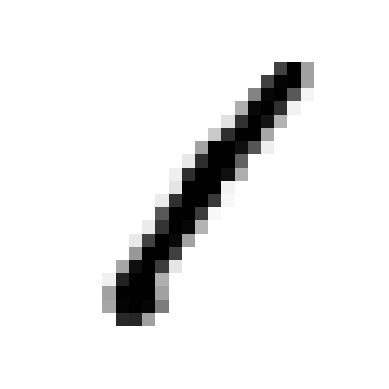

In [41]:
# lets select and convert a pixel value to an image after converting it into a 28x28 array
dig = X.iloc[0]
dig_image = dig.values.reshape(28, 28)

# display the image
plt.imshow(dig_image, cmap=mlb.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show();

In [42]:
# check for the Truthiness in the y dataset
y.iloc[0]

1

# 3. Modelling

Classifiers:

* Logistic regression
* K-nearest neighbors
* Support vector machines

## 3.1 Split training and test data

In [43]:
# split the data
X_train, y_train, X_test = train.iloc[:, 1:], train.iloc[:, :1], test

In [44]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
X_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
y_train.tail()

,label
41995,0
41996,1
41997,7
41998,6
41999,9


In [47]:
# normalise the datasets
X_train = X_train / 255
X_test = X_test / 255

In [48]:
# get the shapes of the splitted datasets
X_train.shape, y_train.shape, X_test.shape

((42000, 784), (42000, 1), (28000, 784))

## 3.2 Fit model to the data and make predictions

### 3.2.1 Logistic regression

In [49]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

93.93

### 3.2.2 K-nearest neighbors

In [50]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

97.91

### 3.2.3 Support vector machines

In [51]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

98.91

## 3.3 Model training and hyperparameter tuning

### 3.3.1 Training accuracy

In [53]:
models = {
    'Model': [
        'Logistic regression', 
        'K-nearest neighbors', 
        'Support vector machines'
    ], 
    'Score': [
        acc_log,
        acc_knn, 
        acc_svc
    ]
}

models_df = pd.DataFrame(models)

models_df.sort_values(by='Score', ascending=False, ignore_index=True)

,Model,Score
0,Support vector machines,98.91
1,K-nearest neighbors,97.91
2,Logistic regression,93.93


### 3.3.2 K-fold cross validation

K-fold cross-validation is a technique used in machine learning for assessing how well a model performs on a dataset. The dataset is divided into k subsets of approximately equal size, and the model is trained k times, each time using a different subset as the validation set and the remaining data as the training set. This allows for a more robust estimation of the model's performance compared to a single train-test split.

In [54]:
# create a list which contains classifiers
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC()
]

len(classifiers)

3

In [55]:
# create a list which contains results for each classifier
cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=3))

In [56]:
cv_results

[array([0.91592857, 0.91607143, 0.91635714]),
 array([0.96457143, 0.96328571, 0.96478571]),
 array([0.97364286, 0.97285714, 0.97621429])]

In [57]:
# mean and standard deviation of cross validation results for each classifier
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [58]:
cv_res = pd.DataFrame(
    {
        'Cross validation mean': cv_mean,
        'Cross validation std': cv_std,
        'Algorithm': [
        'Logistic regression', 
        'K-nearest neighbors', 
        'Support vector machines'
    ]
    }
)

cv_res.sort_values(by='Cross validation mean', ascending=False, ignore_index=True)

# Note: Support vector machines is the best performing model

,Cross validation mean,Cross validation std,Algorithm
0,0.974238,0.001434,Support vector machines
1,0.964214,0.000662,K-nearest neighbors
2,0.916119,0.000178,Logistic regression


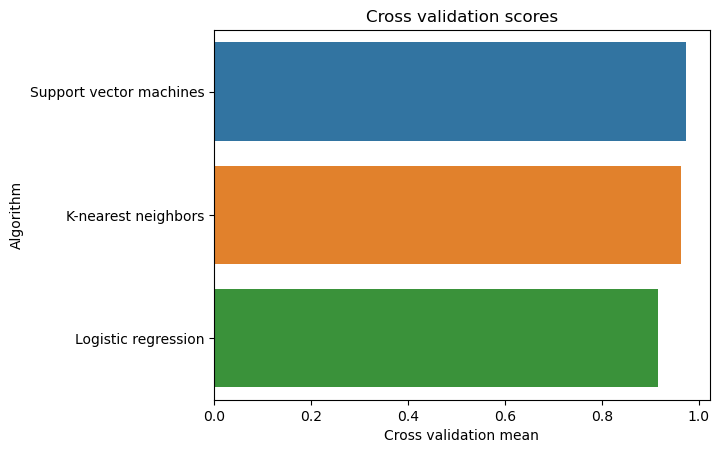

In [59]:
# get the plot of the models scores
cv_res_sorted = cv_res.sort_values(by='Cross validation mean', ascending=False)
sns.barplot(x='Cross validation mean', y='Algorithm', data=cv_res_sorted)
plt.title('Cross validation scores');

# Note: Support vector machines is the best performing model

In [60]:
# training accuracy
svc = SVC(C=100, gamma=0.01, kernel='rbf')
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

100.0

# 4. Prepare data for submission

In [72]:
ss

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [73]:
# create submission dataframe
submit = pd.DataFrame(
    {
    'ImageId': ss['ImageId'],
    'Label': Y_pred
    }
)

submit

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [70]:
# make sure our DataFrame has same shape as the sample submission
ss.shape, submit.shape

((28000, 2), (28000, 2))

In [71]:
# create a csv file
submit.to_csv('digit-recognizer/svm_digit.csv', index=False)